In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [22]:
# switching logic with dynamic update of avg. confidenc, epsilon greedy and keeping a track of the latest E value for each model.
log_v1 = pd.read_csv("/home/maggy/SERC/my_project/NAIVE_1/previous logs/log_v1.csv")
log_v1

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5n,0.721736,1,1.556331,16.1,0.059034,0.053143,21.248561,0.057280
1,2,3.846236,100,229.161,yolov5n,0.507850,6,1.609249,64.6,0.060136,0.058417,21.046794,0.155104
2,3,3.523685,100,236.386,yolov5n,0.624531,8,1.376766,53.3,0.057994,0.056423,20.808315,0.249077
3,4,3.609265,100,197.637,yolov5n,0.547537,13,1.152768,53.7,0.051263,0.050030,20.631268,0.329885
4,5,3.473911,100,171.976,yolov5n,0.437539,20,1.712764,62.3,0.061724,0.060092,20.434522,0.427365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,8.137519,100,210.408,yolov5n,0.476134,4,1.198117,52.1,0.034237,0.033102,314.495002,4089.805353
24995,24996,7.994686,100,86.901,yolov5n,0.000000,0,1.139401,61.8,0.031979,0.030885,314.408298,4089.849801
24996,24997,7.936606,100,209.051,yolov5n,0.568840,2,1.306149,55.1,0.036041,0.034864,314.336615,4089.911396
24997,24998,7.475159,100,280.688,yolov5n,0.674120,3,1.271359,50.9,0.035505,0.034341,314.275287,4089.980482


In [5]:
# switching logic with dynamic update of avg. confidenc and epsilon greedy only.
log_v2 = pd.read_csv("log_v2.csv")
log_v2

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5s,0.920518,1,47.615052,34.4,1.514103,1.487099,2.036878,1.492888
1,2,3.846236,100,229.161,yolov5s,0.622980,7,5.919723,88.3,0.170523,0.166817,1.947555,1.698377
2,3,3.523685,100,236.386,yolov5s,0.636238,14,5.391100,79.1,0.156808,0.153977,1.809705,1.891164
3,4,3.609265,100,197.637,yolov5s,0.585640,18,5.120043,80.6,0.148240,0.145547,1.726393,2.070680
4,5,3.473911,100,171.976,yolov5s,0.487946,23,4.494617,75.0,0.130965,0.128302,1.596373,2.228936
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2097,2.005684,100,129.736,yolov5n,0.555662,3,2.004389,30.7,0.058505,0.056149,0.089099,773.424173
2095,2098,1.999402,100,312.870,yolov5n,0.321360,1,2.206660,32.0,0.066975,0.064523,0.126548,773.980743
2096,2099,2.138096,100,296.843,yolov5n,0.712448,3,2.027034,38.2,0.061520,0.058910,0.126610,774.474649
2097,2100,2.132940,100,195.739,yolov5n,0.506165,31,1.952449,29.4,0.059280,0.057243,0.100771,774.954031


In [6]:
# switching logic with dynamic update of avg. confidenc only.
log_v3 = pd.read_csv("log_v3.csv")
log_v3

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5n,0.720895,1,37.990137,30.1,1.277413,1.261585,8.566040,1.267137
1,2,3.846236,100,229.161,yolov5n,0.572413,6,2.219050,64.1,0.064072,0.061468,8.352444,1.365480
2,3,3.523685,100,236.386,yolov5n,0.561332,11,2.881706,81.3,0.081986,0.077807,8.134421,1.480784
3,4,3.609265,100,197.637,yolov5n,0.534103,16,1.920100,66.7,0.056296,0.053377,7.984762,1.577515
4,5,3.473911,100,171.976,yolov5n,0.441152,19,2.936944,75.0,0.085940,0.083592,7.811876,1.687857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2190,2.131519,100,185.686,yolov5n,0.525507,2,2.256525,44.0,0.060961,0.058796,0.100456,810.220211
2189,2191,2.284496,100,174.519,yolov5n,0.420060,2,1.998225,34.4,0.057656,0.055496,0.098538,810.665920
2190,2192,2.035142,100,216.096,yolov5n,0.528693,4,2.298700,28.6,0.065027,0.062541,0.607491,811.653225
2191,2193,2.058667,100,273.992,yolov5n,0.645396,4,2.445001,64.0,0.066093,0.063780,0.276277,811.760555


In [7]:
# switching logic with dynamic update of avg. confidenc, and keeping a track of the latest E value for each model.
log_v4 = pd.read_csv("log_v4.csv")
log_v4

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5n,0.720895,1,42.032790,38.7,1.287527,1.276610,8.054137,1.282221
1,2,3.846236,100,229.161,yolov5n,0.572413,6,2.504571,66.3,0.069838,0.066856,7.846940,1.388668
2,3,3.523685,100,236.386,yolov5n,0.561332,11,2.756768,71.6,0.073975,0.071638,7.654887,1.517401
3,4,3.609265,100,197.637,yolov5n,0.534103,16,3.628897,90.4,0.100818,0.097936,7.522713,1.646656
4,5,3.473911,100,171.976,yolov5n,0.441152,19,2.856865,75.9,0.076622,0.074298,7.350989,1.749756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2020,2.286732,100,185.055,yolov5n,0.520274,18,2.732781,35.3,0.071217,0.068305,0.608515,731.864230
2019,2021,2.322282,100,173.967,yolov5n,0.523719,6,2.598748,75.0,0.065364,0.062829,0.292401,731.957608
2020,2022,2.120354,100,303.896,yolov5n,0.636985,3,2.136714,29.3,0.060092,0.058027,0.596932,732.706010
2021,2023,2.098473,100,139.383,yolov5n,0.631627,6,2.121088,64.6,0.059067,0.056790,0.257637,732.787052


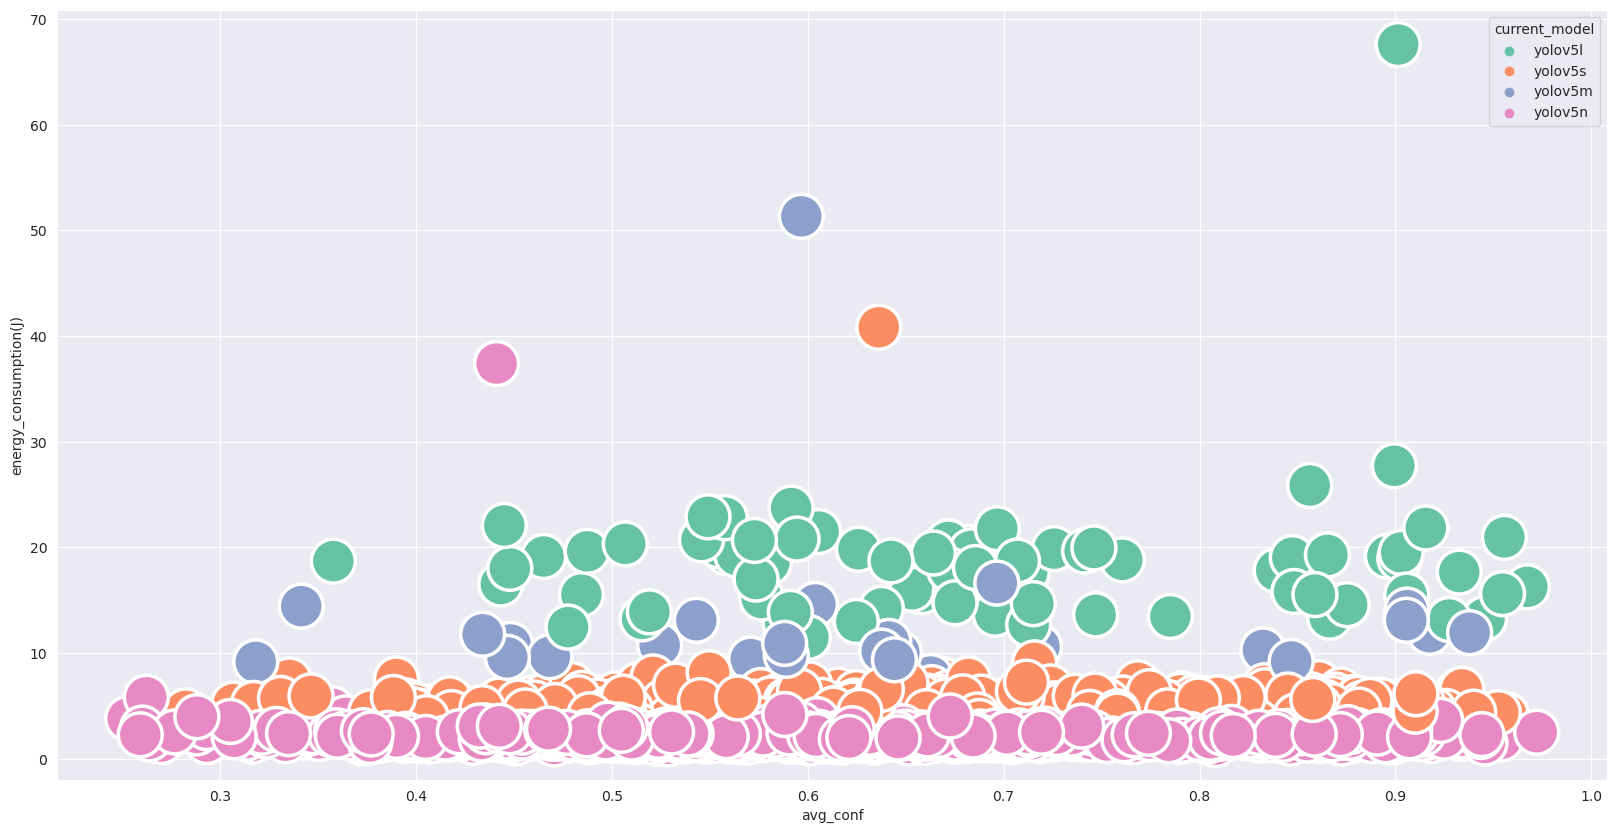

In [8]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=log_v1, x="avg_conf", y="energy_consumption(J)", hue="current_model", s=1000)
plt.show()

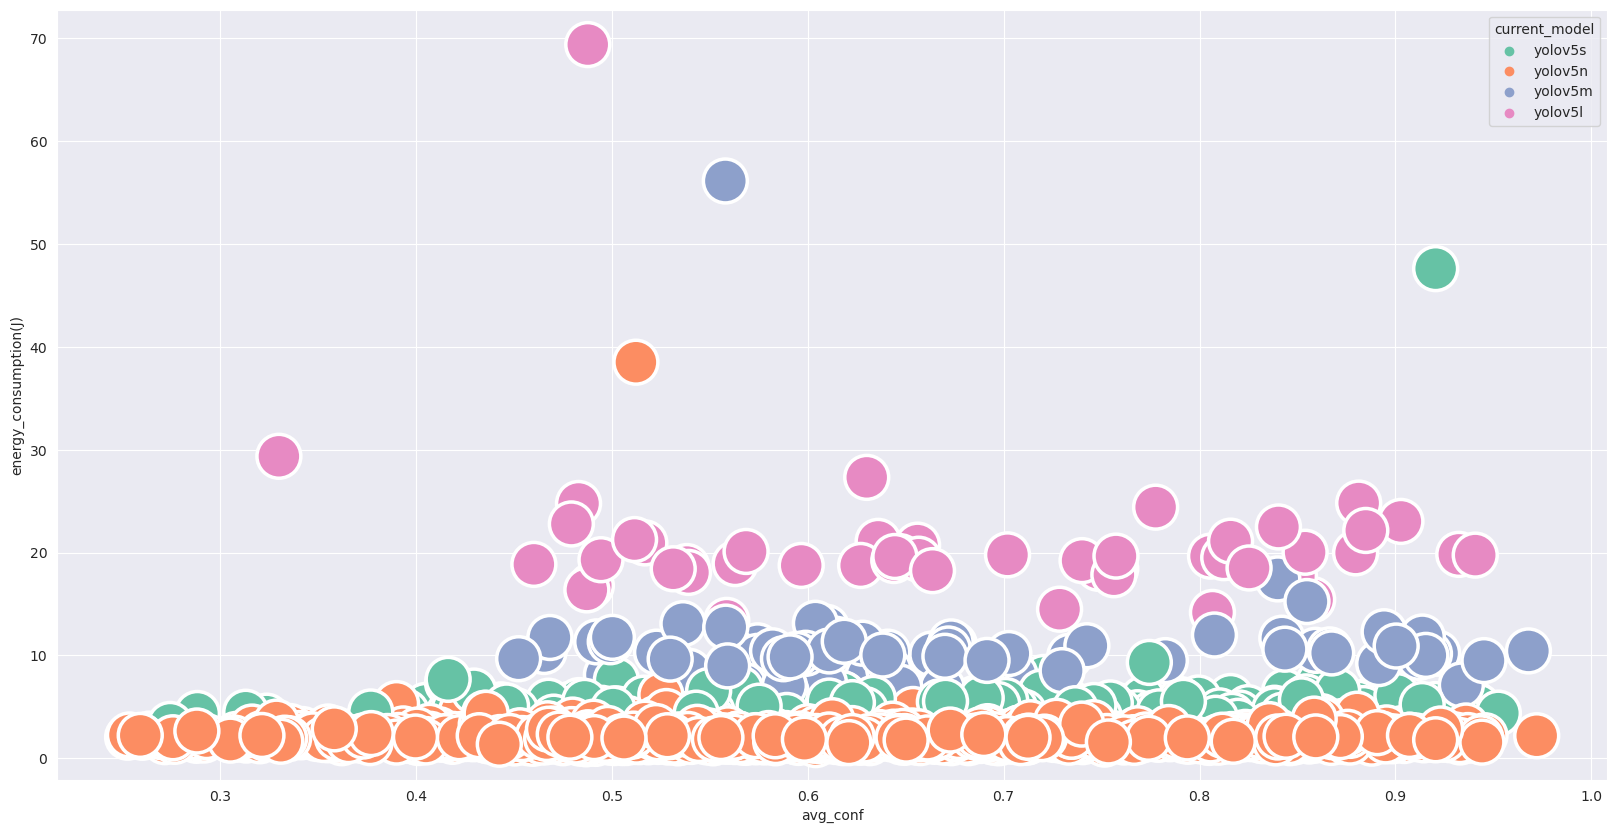

In [9]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=log_v2, x="avg_conf", y="energy_consumption(J)", hue="current_model", s=1000)
plt.show()

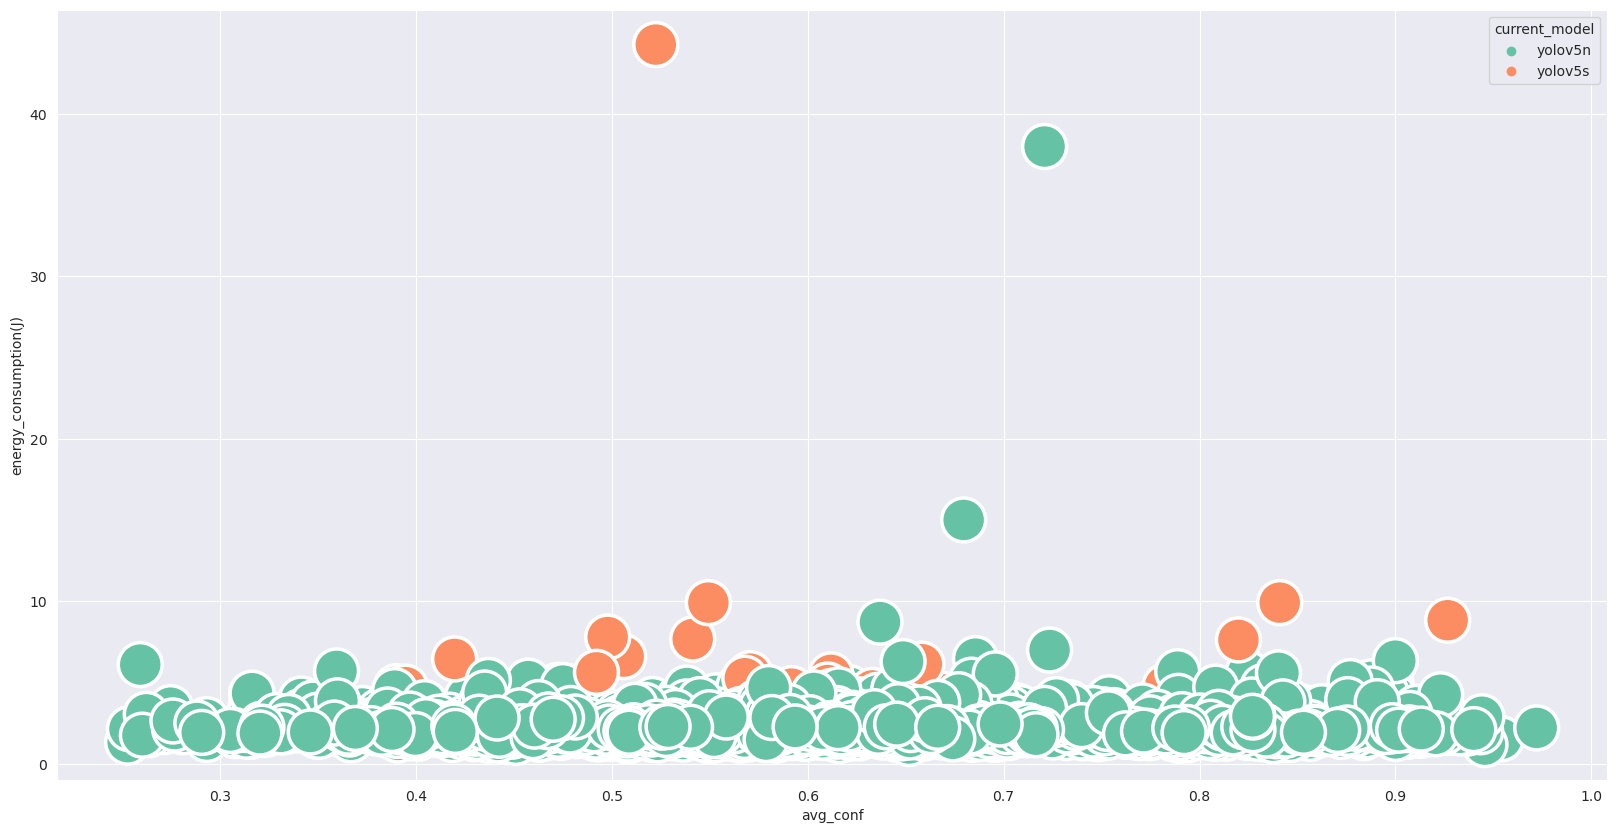

In [10]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=log_v3, x="avg_conf", y="energy_consumption(J)", hue="current_model", s=1000)
plt.show()

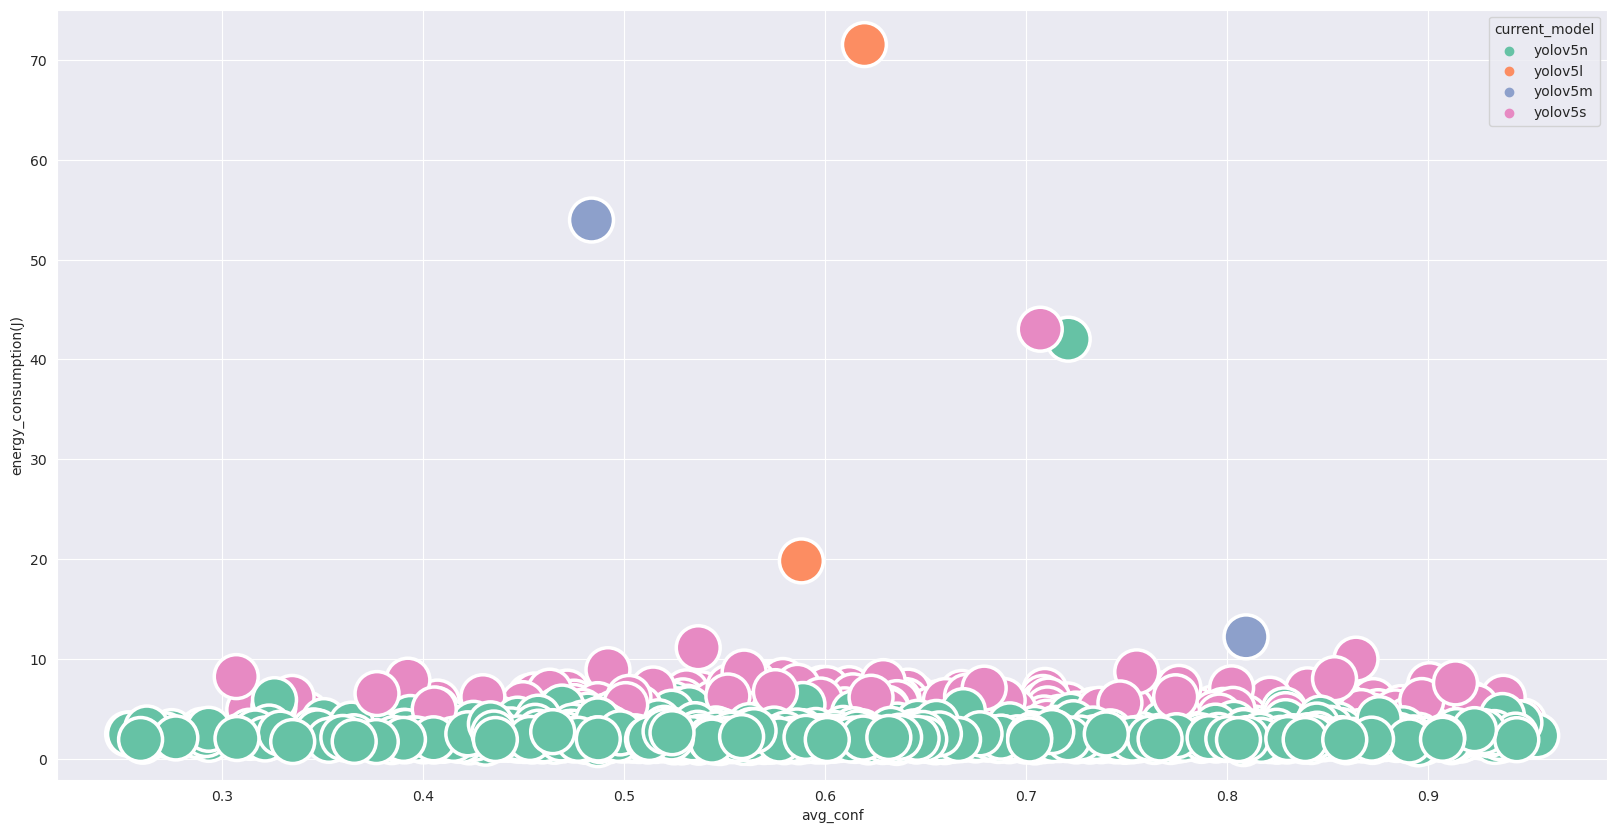

In [11]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=log_v4, x="avg_conf", y="energy_consumption(J)", hue="current_model", s=1000)
plt.show()

In [12]:
# 

In [2]:
nano_model = pd.read_csv("/home/maggy/SERC/my_project/NAIVE_1/previous logs/nano.csv")
nano_model

<IPython.core.display.Javascript object>

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5n,0.721736,1,1.556331,16.1,0.059034,0.053143,21.248561,0.057280
1,2,3.846236,100,229.161,yolov5n,0.507850,6,1.609249,64.6,0.060136,0.058417,21.046794,0.155104
2,3,3.523685,100,236.386,yolov5n,0.624531,8,1.376766,53.3,0.057994,0.056423,20.808315,0.249077
3,4,3.609265,100,197.637,yolov5n,0.547537,13,1.152768,53.7,0.051263,0.050030,20.631268,0.329885
4,5,3.473911,100,171.976,yolov5n,0.437539,20,1.712764,62.3,0.061724,0.060092,20.434522,0.427365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,8.137519,100,210.408,yolov5n,0.476134,4,1.198117,52.1,0.034237,0.033102,314.495002,4089.805353
24995,24996,7.994686,100,86.901,yolov5n,0.000000,0,1.139401,61.8,0.031979,0.030885,314.408298,4089.849801
24996,24997,7.936606,100,209.051,yolov5n,0.568840,2,1.306149,55.1,0.036041,0.034864,314.336615,4089.911396
24997,24998,7.475159,100,280.688,yolov5n,0.674120,3,1.271359,50.9,0.035505,0.034341,314.275287,4089.980482


In [3]:
small_model = pd.read_csv("/home/maggy/SERC/my_project/NAIVE_1/previous logs/small.csv")
small_model

<IPython.core.display.Javascript object>

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5s,0.866612,1,3.606498,35.9,0.115274,0.108502,20.155751,0.113257
1,2,3.846236,100,229.161,yolov5s,0.685380,5,3.611380,75.7,0.107900,0.106187,20.001115,0.257851
2,3,3.523685,100,236.386,yolov5s,0.720304,9,3.652945,74.2,0.115136,0.113309,19.834401,0.420380
3,4,3.609265,100,197.637,yolov5s,0.597608,17,3.768301,79.7,0.114082,0.112204,19.728122,0.577178
4,5,3.473911,100,171.976,yolov5s,0.557305,22,4.547962,80.0,0.128847,0.126580,19.613514,0.746163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,8.137519,100,210.408,yolov5s,0.628558,4,5.431810,90.9,0.141482,0.139451,1395.924455,5171.489863
24995,24996,7.994686,100,86.901,yolov5s,0.339237,2,4.684009,92.8,0.115579,0.113780,1395.929787,5171.625309
24996,24997,7.936606,100,209.051,yolov5s,0.558574,3,5.303331,91.1,0.135132,0.133745,1395.962713,5171.791178
24997,24998,7.475159,100,280.688,yolov5s,0.726342,3,5.037829,82.4,0.121656,0.119643,1396.014780,5171.973864


In [4]:
med_model = pd.read_csv("/home/maggy/SERC/my_project/NAIVE_1/previous logs/med.csv")
med_model

<IPython.core.display.Javascript object>

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5m,0.892287,1,6.761214,28.8,0.217136,0.210293,16.447248,0.215572
1,2,3.846236,100,229.161,yolov5m,0.633197,7,7.770549,68.0,0.247844,0.245252,16.420344,0.500426
2,3,3.523685,100,236.386,yolov5m,0.722609,10,6.445113,58.9,0.196470,0.193930,16.331342,0.744608
3,4,3.609265,100,197.637,yolov5m,0.567292,18,6.790022,76.4,0.182433,0.179632,16.302217,0.963004
4,5,3.473911,100,171.976,yolov5m,0.444544,19,8.089518,70.6,0.259311,0.258058,16.313154,1.253923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,24995,8.137519,100,210.408,yolov5m,0.537807,6,10.982638,80.9,0.259620,0.258329,3626.723612,7407.193180
24993,24996,7.994686,100,86.901,yolov5m,0.429903,4,9.364661,84.5,0.212989,0.211339,3626.828069,7407.425928
24994,24997,7.936606,100,209.051,yolov5m,0.785902,2,7.914042,79.9,0.170954,0.169694,3626.903942,7407.638853
24995,24998,7.475159,100,280.688,yolov5m,0.742075,4,10.334691,81.9,0.237278,0.236027,3627.053566,7407.920347


In [5]:
large_model = pd.read_csv("/home/maggy/SERC/my_project/NAIVE_1/previous logs/large.csv")
large_model

<IPython.core.display.Javascript object>

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5l,0.909670,1,14.058131,17.8,0.399647,0.386669,51.420542,0.394893
1,2,3.846236,100,229.161,yolov5l,0.592351,9,12.796659,64.8,0.333715,0.331454,51.476460,0.766237
2,3,3.523685,100,236.386,yolov5l,0.712489,12,12.354156,61.7,0.341388,0.338109,51.542780,1.146629
3,4,3.609265,100,197.637,yolov5l,0.607919,19,10.496006,59.2,0.307696,0.305528,51.620585,1.486414
4,5,3.473911,100,171.976,yolov5l,0.468766,14,12.837979,58.8,0.338439,0.336916,51.689170,1.850968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,24995,8.137519,100,210.408,yolov5l,0.690016,4,16.115742,86.7,0.323547,0.321728,7341.252012,11086.124674
24993,24996,7.994686,100,86.901,yolov5l,0.561310,3,19.027051,90.3,0.419659,0.417735,7341.563777,11086.565146
24994,24997,7.936606,100,209.051,yolov5l,0.914531,2,16.868182,83.1,0.341255,0.340071,7341.795839,11086.933871
24995,24998,7.475159,100,280.688,yolov5l,0.637995,5,22.209843,83.8,0.488046,0.486073,7342.212479,11087.482723


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'log_v1' is not defined

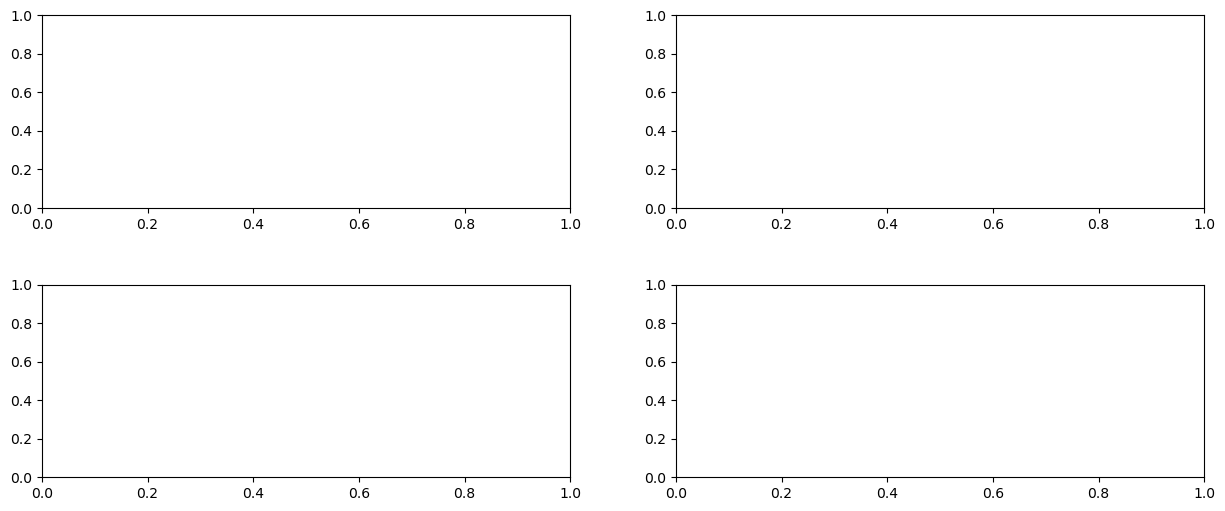

In [6]:
# before switching

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
hue_order = log_v1["current_model"].unique()

sns.scatterplot(data=nano_model[:2010], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][0])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[0][0])
axs[0][0].set_ylim(-5, 75)
axs[0][0].set_title("Nano Model")
axs[0][0].get_legend().remove()

sns.scatterplot(data=small_model[:2010], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][1])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[0][1])
axs[0][1].set_ylim(-5, 75)
axs[0][1].set_title("Small Model")
axs[0][1].get_legend().remove()

sns.scatterplot(data=med_model[:2010], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][0])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[1][0])
axs[1][0].set_ylim(-5, 75)
axs[1][0].set_title("Medium Model")
axs[1][0].get_legend().remove()

sns.scatterplot(data=large_model[:2010], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][1])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[1][1])
axs[1][1].set_ylim(-5, 75)
axs[1][1].set_title("Large Model")
axs[1][1].get_legend().remove()

handles, labels = axs[0][0].get_legend_handles_labels()
legend = axs[-1, -1].legend(handles, labels, title="current_model", loc="upper right", bbox_to_anchor=(1.25, 1.5))
fig.suptitle("Before Switching")
plt.show()

# ------------------------------------------------------------------------------------------------------------------------
# after switching

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
hue_order = log_v1["current_model"].unique()

sns.scatterplot(data=log_v1, x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][0])
sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[0][0])
axs[0][0].get_legend().remove()
axs[0][0].set_ylim(-5, 75)
axs[0][0].set_title("updating avg_conf + epsilon greedy + latest E values")

sns.scatterplot(data=log_v2, x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][1])
sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[0][1])
axs[0][1].get_legend().remove()
axs[0][1].set_ylim(-5, 75)
axs[0][1].set_title("updating avg_conf + epsilon greedy")

sns.scatterplot(data=log_v3, x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][0])
sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[1][0])
axs[1][0].get_legend().remove()
axs[1][0].set_ylim(-5, 75)
axs[1][0].set_title("updating avg_conf")

sns.scatterplot(data=log_v4, x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][1])
sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[1][1])
axs[1][1].get_legend().remove()
axs[1][1].set_ylim(-5, 75)
axs[1][1].set_title("updating avg_conf + latest E values")

handles, labels = axs[0][0].get_legend_handles_labels()
legend = axs[-1, -1].legend(handles, labels, title="current_model", loc="upper right", bbox_to_anchor=(1.25, 1.5))
fig.suptitle("After Switching")
plt.show()

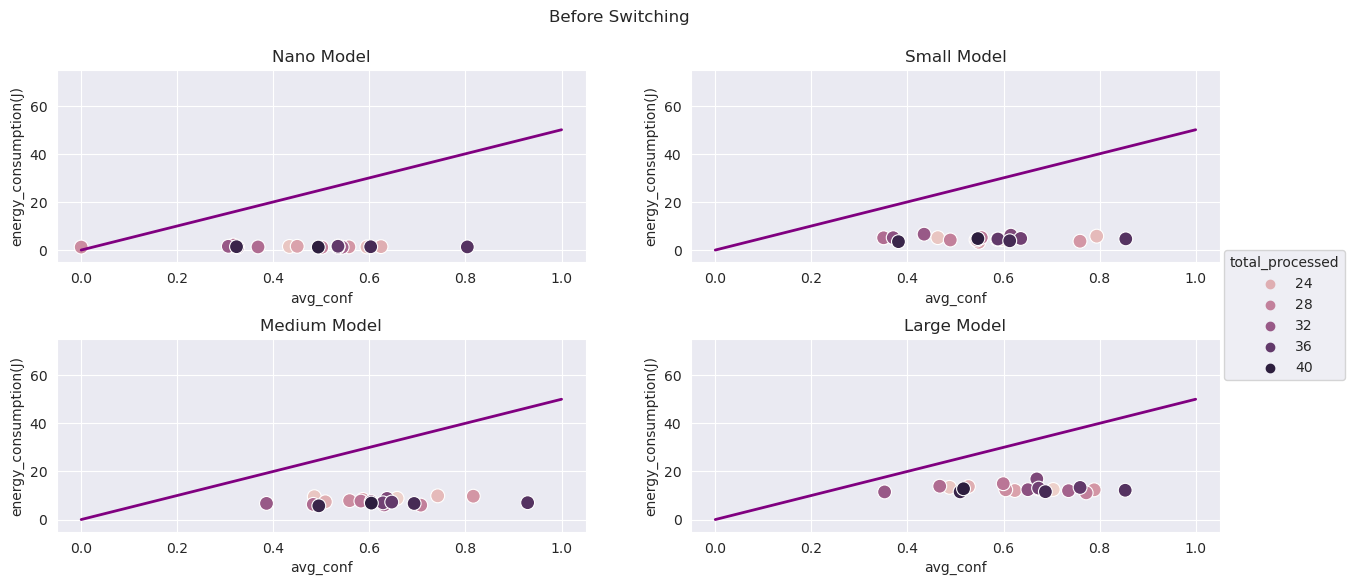

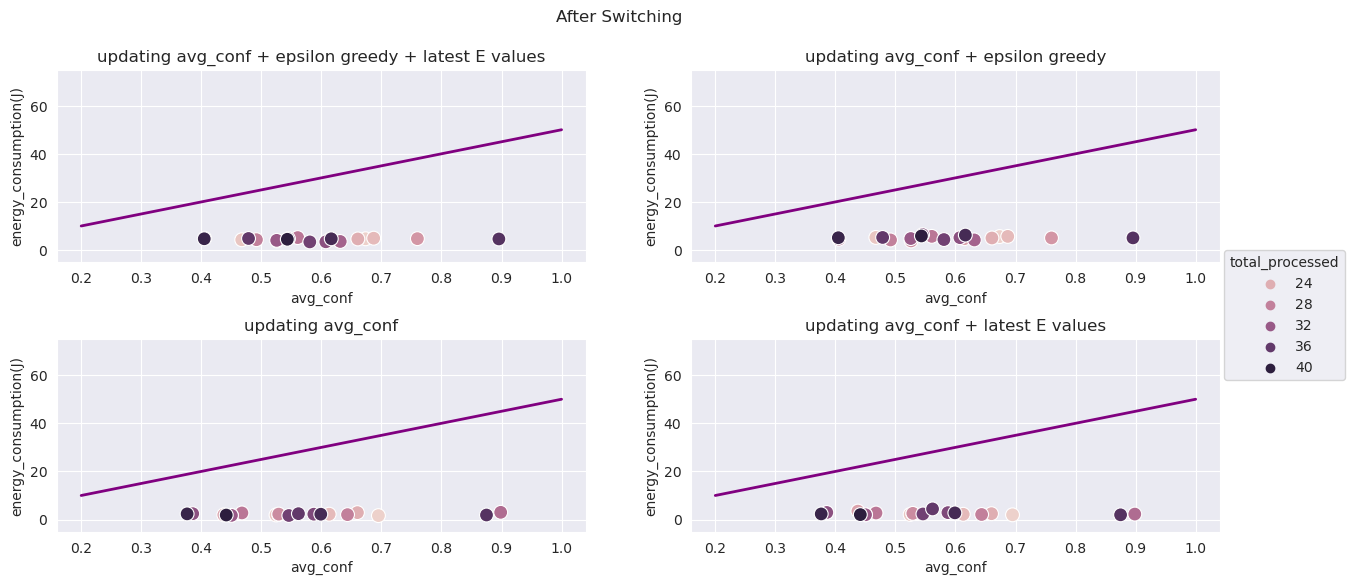

In [22]:
# before switching

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
hue_order = log_v1["total_processed"].unique()

sns.scatterplot(data=nano_model[20:40], x="avg_conf", y="energy_consumption(J)", hue="total_processed", hue_order=hue_order, s=100, ax=axs[0][0])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[0][0])
axs[0][0].set_ylim(-5, 75)
axs[0][0].set_title("Nano Model")
axs[0][0].get_legend().remove()

sns.scatterplot(data=small_model[20:40], x="avg_conf", y="energy_consumption(J)", hue="total_processed", hue_order=hue_order, s=100, ax=axs[0][1])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[0][1])
axs[0][1].set_ylim(-5, 75)
axs[0][1].set_title("Small Model")
axs[0][1].get_legend().remove()

sns.scatterplot(data=med_model[20:40], x="avg_conf", y="energy_consumption(J)", hue="total_processed", hue_order=hue_order, s=100, ax=axs[1][0])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[1][0])
axs[1][0].set_ylim(-5, 75)
axs[1][0].set_title("Medium Model")
axs[1][0].get_legend().remove()

sns.scatterplot(data=large_model[20:40], x="avg_conf", y="energy_consumption(J)", hue="total_processed", hue_order=hue_order, s=100, ax=axs[1][1])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[1][1])
axs[1][1].set_ylim(-5, 75)
axs[1][1].set_title("Large Model")
axs[1][1].get_legend().remove()

handles, labels = axs[0][0].get_legend_handles_labels()
legend = axs[-1, -1].legend(handles, labels, title="total_processed", loc="upper right", bbox_to_anchor=(1.25, 1.5))
fig.suptitle("Before Switching")
plt.show()

# ------------------------------------------------------------------------------------------------------------------------
# after switching

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
hue_order = log_v1["total_processed"].unique()

sns.scatterplot(data=log_v1[20:40], x="avg_conf", y="energy_consumption(J)", hue="total_processed", hue_order=hue_order, s=100, ax=axs[0][0])
sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[0][0])
axs[0][0].get_legend().remove()
axs[0][0].set_ylim(-5, 75)
axs[0][0].set_title("updating avg_conf + epsilon greedy + latest E values")

sns.scatterplot(data=log_v2[20:40], x="avg_conf", y="energy_consumption(J)", hue="total_processed", hue_order=hue_order, s=100, ax=axs[0][1])
sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[0][1])
axs[0][1].get_legend().remove()
axs[0][1].set_ylim(-5, 75)
axs[0][1].set_title("updating avg_conf + epsilon greedy")

sns.scatterplot(data=log_v3[20:40], x="avg_conf", y="energy_consumption(J)", hue="total_processed", hue_order=hue_order, s=100, ax=axs[1][0])
sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[1][0])
axs[1][0].get_legend().remove()
axs[1][0].set_ylim(-5, 75)
axs[1][0].set_title("updating avg_conf")

sns.scatterplot(data=log_v4[20:40], x="avg_conf", y="energy_consumption(J)", hue="total_processed", hue_order=hue_order, s=100, ax=axs[1][1])
sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[1][1])
axs[1][1].get_legend().remove()
axs[1][1].set_ylim(-5, 75)
axs[1][1].set_title("updating avg_conf + latest E values")

handles, labels = axs[0][0].get_legend_handles_labels()
legend = axs[-1, -1].legend(handles, labels, title="total_processed", loc="upper right", bbox_to_anchor=(1.25, 1.5))
fig.suptitle("After Switching")
plt.show()

---

In [15]:
log_1_ep = pd.read_csv("log_0.1_ep.csv")
# log_1_ep

In [16]:
log_2_ep = pd.read_csv("log_0.2_ep.csv")
# log_2_ep

In [17]:
log_3_ep = pd.read_csv("log_0.3_ep.csv")    
# log_3_ep

In [18]:
log_5_ep = pd.read_csv("log_0.5_ep.csv")
# log_5_ep

In [7]:
nano_model["total_conf"] = nano_model["avg_conf"] * nano_model["current_boxes"]
small_model["total_conf"] = small_model["avg_conf"] * small_model["current_boxes"]
med_model["total_conf"] = med_model["avg_conf"] * med_model["current_boxes"]
large_model["total_conf"] = large_model["avg_conf"] * large_model["current_boxes"]

In [8]:
log_boxes = pd.read_csv("log_0.01_boxes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

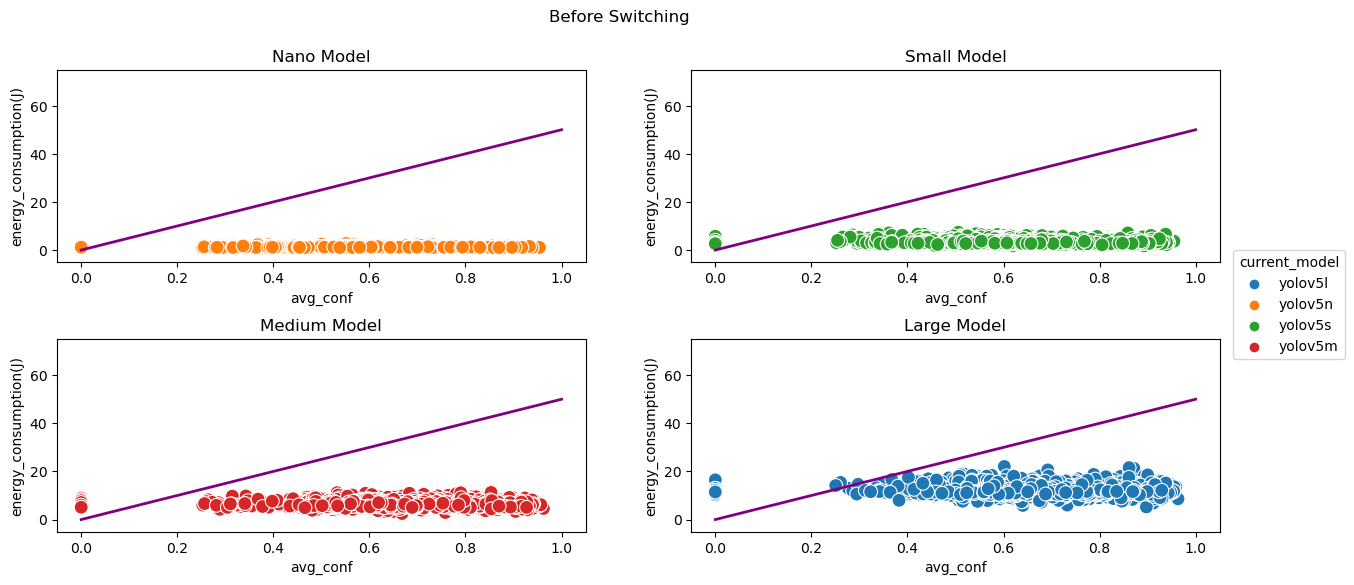

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

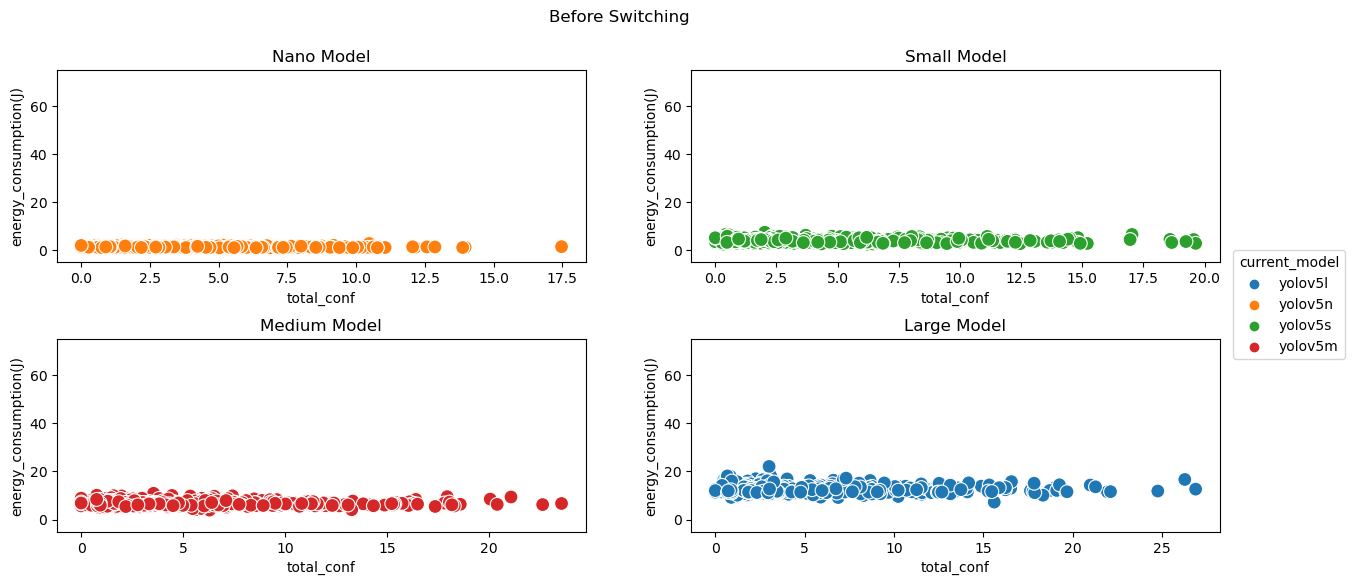

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

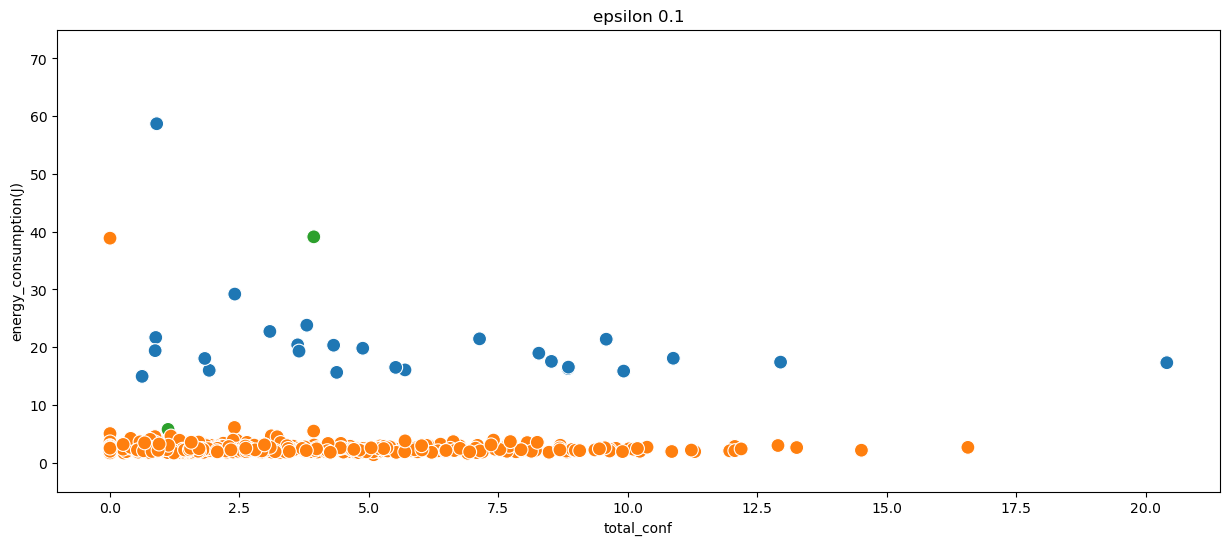

In [15]:
# before switching

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
hue_order = log_boxes["current_model"].unique()

sns.scatterplot(data=nano_model[:2010], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][0])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[0][0])
axs[0][0].set_ylim(-5, 75)
axs[0][0].set_title("Nano Model")
axs[0][0].get_legend().remove()

sns.scatterplot(data=small_model[:2010], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][1])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[0][1])
axs[0][1].set_ylim(-5, 75)
axs[0][1].set_title("Small Model")
axs[0][1].get_legend().remove()

sns.scatterplot(data=med_model[:2010], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][0])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[1][0])
axs[1][0].set_ylim(-5, 75)
axs[1][0].set_title("Medium Model")
axs[1][0].get_legend().remove()

sns.scatterplot(data=large_model[:2010], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][1])
sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[1][1])
axs[1][1].set_ylim(-5, 75)
axs[1][1].set_title("Large Model")
axs[1][1].get_legend().remove()

handles, labels = axs[0][0].get_legend_handles_labels()
legend = axs[-1, -1].legend(handles, labels, title="current_model", loc="upper right", bbox_to_anchor=(1.25, 1.5))
fig.suptitle("Before Switching")
plt.show()

# ------------------------------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
hue_order = log_boxes["current_model"].unique()

sns.scatterplot(data=nano_model[:500], x="total_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][0])
# sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[0][0])
axs[0][0].set_ylim(-5, 75)
axs[0][0].set_title("Nano Model")
axs[0][0].get_legend().remove()

sns.scatterplot(data=small_model[:500], x="total_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][1])
# sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[0][1])
axs[0][1].set_ylim(-5, 75)
axs[0][1].set_title("Small Model")
axs[0][1].get_legend().remove()

sns.scatterplot(data=med_model[:500], x="total_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][0])
# sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[1][0])
axs[1][0].set_ylim(-5, 75)
axs[1][0].set_title("Medium Model")
axs[1][0].get_legend().remove()

sns.scatterplot(data=large_model[:500], x="total_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][1])
# sns.lineplot(x=[i/10 for i in range(11)], y=[5*i for i in range(11)], c="purple", linewidth=2, ax=axs[1][1])
axs[1][1].set_ylim(-5, 75)
axs[1][1].set_title("Large Model")
axs[1][1].get_legend().remove()

handles, labels = axs[0][0].get_legend_handles_labels()
legend = axs[-1, -1].legend(handles, labels, title="current_model", loc="upper right", bbox_to_anchor=(1.25, 1.5))
fig.suptitle("Before Switching")
plt.show()


#--------------------------------------

fig, axs = plt.subplots(1, 1, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
hue_order = log_boxes["current_model"].unique()

sns.scatterplot(data=log_boxes[:500], x="total_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100)
# sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[0][0])
axs.get_legend().remove()
axs.set_ylim(-5, 75)
axs.set_title("epsilon 0.1")

# sns.scatterplot(data=log_2_ep[:500], x="total_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][1])
# # sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[0][1])
# axs[0][1].get_legend().remove()
# axs[0][1].set_ylim(-5, 75)
# axs[0][1].set_title("epsilon 0.2")

# sns.scatterplot(data=log_3_ep[:500], x="total_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][0])
# # sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[1][0])
# axs[1][0].get_legend().remove()
# axs[1][0].set_ylim(-5, 75)
# axs[1][0].set_title("epsilon 0.3")

# sns.scatterplot(data=log_5_ep[:500], x="total_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][1])
# # sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[1][1])
# axs[1][1].get_legend().remove()
# axs[1][1].set_ylim(-5, 75)
# axs[1][1].set_title("epsilon 0.5")

# handles, labels = axs[0][0].get_legend_handles_labels()
# legend = axs[-1, -1].legend(handles, labels, title="current_model", loc="upper right", bbox_to_anchor=(1.25, 1.5))
# fig.suptitle("After Switching")
plt.show()

#-----

# # fig, axs = plt.subplots(2, 2, figsize=(15, 6))
# plt.subplots_adjust(wspace=0.2, hspace=0.4)
# hue_order = log_1_ep["current_model"].unique()

# sns.scatterplot(data=log_1_ep[:500], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][0])
# sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[0][0])
# axs[0][0].get_legend().remove()
# axs[0][0].set_ylim(-5, 75)
# axs[0][0].set_title("epsilon 0.1")

# sns.scatterplot(data=log_2_ep[:500], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[0][1])
# sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[0][1])
# axs[0][1].get_legend().remove()
# axs[0][1].set_ylim(-5, 75)
# axs[0][1].set_title("epsilon 0.2")

# sns.scatterplot(data=log_3_ep[:500], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][0])
# sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[1][0])
# axs[1][0].get_legend().remove()
# axs[1][0].set_ylim(-5, 75)
# axs[1][0].set_title("epsilon 0.3")

# sns.scatterplot(data=log_5_ep[:500], x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100, ax=axs[1][1])
# sns.lineplot(x=[i/10 for i in range(2, 11)], y=[5*i for i in range(2, 11)], c="purple", linewidth=2, ax=axs[1][1])
# axs[1][1].get_legend().remove()
# axs[1][1].set_ylim(-5, 75)
# axs[1][1].set_title("epsilon 0.5")

# handles, labels = axs[0][0].get_legend_handles_labels()
# legend = axs[-1, -1].legend(handles, labels, title="current_model", loc="upper right", bbox_to_anchor=(1.25, 1.5))
# fig.suptitle("After Switching")
# plt.show()

---

In [35]:
nano_model["score"] = (nano_model["current_boxes"] * nano_model["avg_conf"])/(nano_model["energy_consumption(J)"])
nano_model

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time,total_conf,score
0,1,3.005601,100,160.352,yolov5n,0.721736,1,1.556331,16.1,0.059034,0.053143,21.248561,0.057280,0.721736,0.463742
1,2,3.846236,100,229.161,yolov5n,0.507850,6,1.609249,64.6,0.060136,0.058417,21.046794,0.155104,3.047100,1.893492
2,3,3.523685,100,236.386,yolov5n,0.624531,8,1.376766,53.3,0.057994,0.056423,20.808315,0.249077,4.996248,3.628974
3,4,3.609265,100,197.637,yolov5n,0.547537,13,1.152768,53.7,0.051263,0.050030,20.631268,0.329885,7.117977,6.174683
4,5,3.473911,100,171.976,yolov5n,0.437539,20,1.712764,62.3,0.061724,0.060092,20.434522,0.427365,8.750772,5.109152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,8.137519,100,210.408,yolov5n,0.476134,4,1.198117,52.1,0.034237,0.033102,314.495002,4089.805353,1.904536,1.589608
24995,24996,7.994686,100,86.901,yolov5n,0.000000,0,1.139401,61.8,0.031979,0.030885,314.408298,4089.849801,0.000000,0.000000
24996,24997,7.936606,100,209.051,yolov5n,0.568840,2,1.306149,55.1,0.036041,0.034864,314.336615,4089.911396,1.137679,0.871018
24997,24998,7.475159,100,280.688,yolov5n,0.674120,3,1.271359,50.9,0.035505,0.034341,314.275287,4089.980482,2.022361,1.590708


In [36]:
small_model["score"] = (small_model["current_boxes"] * small_model["avg_conf"])/(small_model["energy_consumption(J)"])
small_model

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time,total_conf,score
0,1,3.005601,100,160.352,yolov5s,0.866612,1,3.606498,35.9,0.115274,0.108502,20.155751,0.113257,0.866612,0.240292
1,2,3.846236,100,229.161,yolov5s,0.685380,5,3.611380,75.7,0.107900,0.106187,20.001115,0.257851,3.426902,0.948918
2,3,3.523685,100,236.386,yolov5s,0.720304,9,3.652945,74.2,0.115136,0.113309,19.834401,0.420380,6.482737,1.774661
3,4,3.609265,100,197.637,yolov5s,0.597608,17,3.768301,79.7,0.114082,0.112204,19.728122,0.577178,10.159341,2.696000
4,5,3.473911,100,171.976,yolov5s,0.557305,22,4.547962,80.0,0.128847,0.126580,19.613514,0.746163,12.260716,2.695870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,8.137519,100,210.408,yolov5s,0.628558,4,5.431810,90.9,0.141482,0.139451,1395.924455,5171.489863,2.514231,0.462872
24995,24996,7.994686,100,86.901,yolov5s,0.339237,2,4.684009,92.8,0.115579,0.113780,1395.929787,5171.625309,0.678474,0.144849
24996,24997,7.936606,100,209.051,yolov5s,0.558574,3,5.303331,91.1,0.135132,0.133745,1395.962713,5171.791178,1.675723,0.315976
24997,24998,7.475159,100,280.688,yolov5s,0.726342,3,5.037829,82.4,0.121656,0.119643,1396.014780,5171.973864,2.179026,0.432533


In [37]:
med_model["score"] = (med_model["current_boxes"] * med_model["avg_conf"])/(med_model["energy_consumption(J)"])
med_model

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time,total_conf,score
0,1,3.005601,100,160.352,yolov5m,0.892287,1,6.761214,28.8,0.217136,0.210293,16.447248,0.215572,0.892287,0.131971
1,2,3.846236,100,229.161,yolov5m,0.633197,7,7.770549,68.0,0.247844,0.245252,16.420344,0.500426,4.432382,0.570408
2,3,3.523685,100,236.386,yolov5m,0.722609,10,6.445113,58.9,0.196470,0.193930,16.331342,0.744608,7.226090,1.121173
3,4,3.609265,100,197.637,yolov5m,0.567292,18,6.790022,76.4,0.182433,0.179632,16.302217,0.963004,10.211252,1.503861
4,5,3.473911,100,171.976,yolov5m,0.444544,19,8.089518,70.6,0.259311,0.258058,16.313154,1.253923,8.446332,1.044108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,24995,8.137519,100,210.408,yolov5m,0.537807,6,10.982638,80.9,0.259620,0.258329,3626.723612,7407.193180,3.226842,0.293813
24993,24996,7.994686,100,86.901,yolov5m,0.429903,4,9.364661,84.5,0.212989,0.211339,3626.828069,7407.425928,1.719612,0.183628
24994,24997,7.936606,100,209.051,yolov5m,0.785902,2,7.914042,79.9,0.170954,0.169694,3626.903942,7407.638853,1.571804,0.198609
24995,24998,7.475159,100,280.688,yolov5m,0.742075,4,10.334691,81.9,0.237278,0.236027,3627.053566,7407.920347,2.968299,0.287217


In [45]:
large_model["score"] = (large_model["current_boxes"] * large_model["avg_conf"])/(large_model["energy_consumption(J)"])
large_model

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time,score
0,1,3.005601,100,160.352,yolov5l,0.909670,1,14.058131,17.8,0.399647,0.386669,51.420542,0.394893,0.064708
1,2,3.846236,100,229.161,yolov5l,0.592351,9,12.796659,64.8,0.333715,0.331454,51.476460,0.766237,0.416605
2,3,3.523685,100,236.386,yolov5l,0.712489,12,12.354156,61.7,0.341388,0.338109,51.542780,1.146629,0.692064
3,4,3.609265,100,197.637,yolov5l,0.607919,19,10.496006,59.2,0.307696,0.305528,51.620585,1.486414,1.100463
4,5,3.473911,100,171.976,yolov5l,0.468766,14,12.837979,58.8,0.338439,0.336916,51.689170,1.850968,0.511196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,24995,8.137519,100,210.408,yolov5l,0.690016,4,16.115742,86.7,0.323547,0.321728,7341.252012,11086.124674,0.171265
24993,24996,7.994686,100,86.901,yolov5l,0.561310,3,19.027051,90.3,0.419659,0.417735,7341.563777,11086.565146,0.088502
24994,24997,7.936606,100,209.051,yolov5l,0.914531,2,16.868182,83.1,0.341255,0.340071,7341.795839,11086.933871,0.108433
24995,24998,7.475159,100,280.688,yolov5l,0.637995,5,22.209843,83.8,0.488046,0.486073,7342.212479,11087.482723,0.143629


In [60]:
log_1_ep["score"] = (log_1_ep["total_conf"])/(log_1_ep["energy_consumption(J)"])
log_1_ep

,total_processed,input_rate,image_quality,file_size(kB),current_model,total_conf,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time,score
0,1,3.005601,100,313.059,yolov5l,14.506375,0.557937,26,84.607937,30.3,2.645648,2.636755,3.232568,2.642452,0.171454
1,2,3.846236,100,290.311,yolov5l,5.788499,0.482375,12,19.301952,80.2,0.450482,0.448774,3.413510,3.141591,0.299892
2,3,3.523685,100,119.390,yolov5l,2.830675,0.707669,4,27.683462,82.5,0.637836,0.636367,3.774077,3.807336,0.102251
3,4,3.609265,100,136.222,yolov5l,1.891578,0.945789,2,17.711930,76.1,0.403677,0.401242,3.891120,4.233349,0.106797
4,5,3.473911,100,200.775,yolov5l,5.029372,0.838229,6,17.231889,76.4,0.383624,0.382393,4.000265,4.646735,0.291864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,2091,1.991286,100,261.606,yolov5l,7.369063,0.736906,10,28.256764,88.6,0.710810,0.709187,43.182867,836.121982,0.260789
2090,2092,1.919002,100,173.588,yolov5l,1.727268,0.575756,3,19.237072,76.9,0.457440,0.455669,43.240735,836.612069,0.089788
2091,2093,1.925738,100,224.190,yolov5l,6.094994,0.677222,9,26.891166,90.1,0.691132,0.690182,43.510260,837.337736,0.226654
2092,2094,2.152694,100,246.667,yolov5l,4.092895,0.454766,9,28.386524,84.7,0.782486,0.779907,43.912683,838.182959,0.144184


In [76]:
log_boxes = pd.read_csv("log_0.01_boxes.csv")
log_boxes["score"] = (log_boxes["total_conf"])/(log_boxes["energy_consumption(J)"])
log_boxes

,total_processed,input_rate,image_quality,file_size(kB),current_model,total_conf,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time,score
0,1,3.005601,100,160.352,yolov5l,0.901400,0.901400,1,58.695773,22.4,2.168238,2.153663,2.201569,2.158289,0.015357
1,2,3.846236,100,229.161,yolov5l,5.696255,0.712032,8,16.065816,66.2,0.447262,0.445863,2.381791,2.635355,0.354557
2,3,3.523685,100,236.386,yolov5l,9.918989,0.762999,13,15.865682,69.8,0.372349,0.371166,2.453076,3.042298,0.625185
3,4,3.609265,100,197.637,yolov5l,10.876759,0.572461,19,18.087905,78.6,0.539296,0.537759,2.767433,3.611296,0.601328
4,5,3.473911,100,171.976,yolov5l,8.523782,0.473543,18,17.542496,71.4,0.492048,0.490978,3.007771,4.134224,0.485893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,2276,2.613047,100,212.916,yolov5n,8.058234,0.537216,15,2.811394,77.5,0.075209,0.073854,221306.760448,763.751931,2.866277
2271,2277,2.437921,100,211.546,yolov5n,5.256035,0.438003,12,2.786187,76.2,0.071911,0.070778,221306.449463,763.855222,1.886462
2272,2278,2.462679,100,301.413,yolov5n,3.993838,0.399384,10,2.885979,74.0,0.072876,0.071389,221306.200922,763.986591,1.383876
2273,2279,2.535429,100,326.589,yolov5n,8.693851,0.543366,16,2.886101,69.6,0.075846,0.074469,221305.924931,764.115616,3.012317


<Axes: xlabel='score', ylabel='Count'>

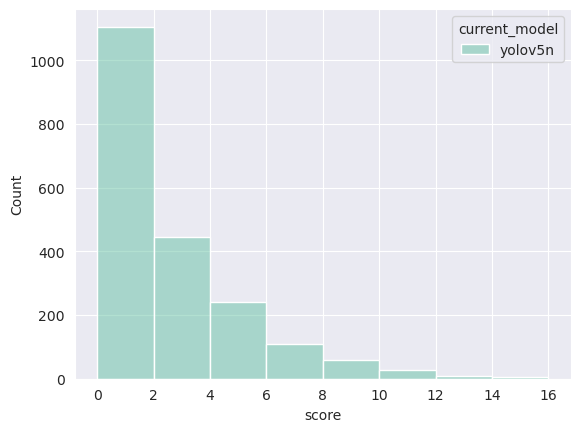

In [79]:
# histogram for score column
sns.histplot(data=nano_model[:2000], x="score", hue="current_model", bins=[0, 2, 4, 6, 8, 10, 12, 14, 16])

<Axes: xlabel='score', ylabel='Count'>

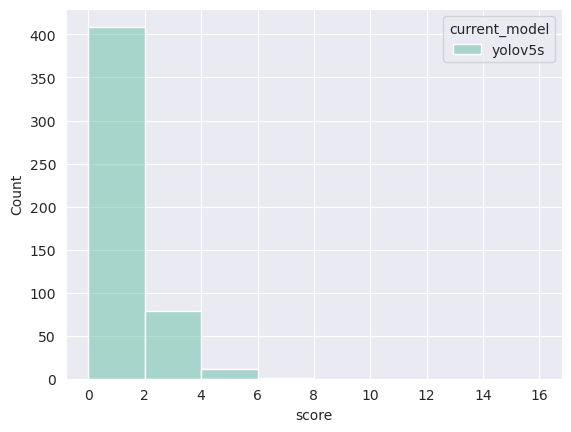

In [54]:
sns.histplot(data=small_model[:500], x="score", hue="current_model", bins=[0, 2, 4, 6, 8, 10, 12, 14, 16])

<Axes: xlabel='score', ylabel='Count'>

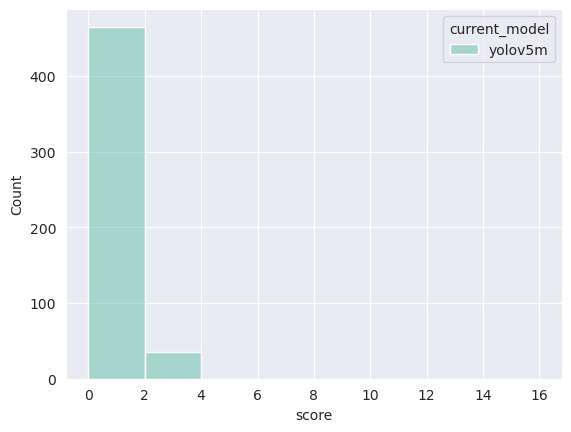

In [55]:
sns.histplot(data=med_model[:500], x="score", hue="current_model", bins=[0, 2, 4, 6, 8, 10, 12, 14, 16])

<Axes: xlabel='score', ylabel='Count'>

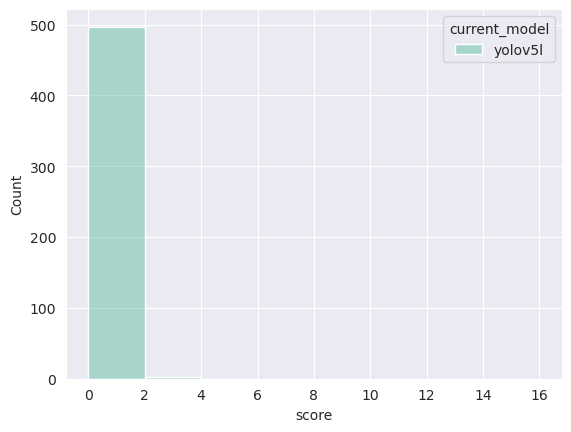

In [56]:
sns.histplot(data=large_model[:500], x="score", hue="current_model", bins=[0, 2, 4, 6, 8, 10, 12, 14, 16])

<Axes: xlabel='score', ylabel='Count'>

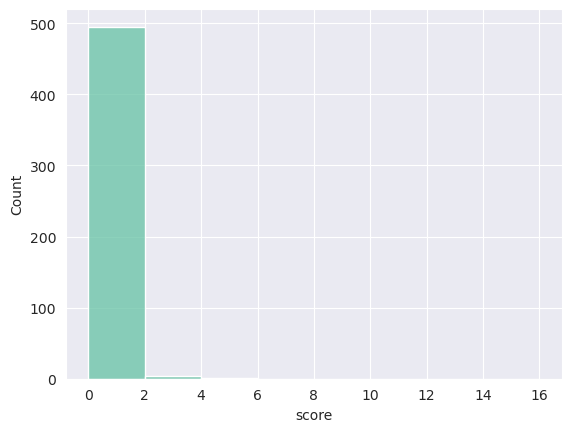

In [61]:
sns.histplot(data=log_1_ep[:500], x="score", bins=[0, 2, 4, 6, 8, 10, 12, 14, 16])

<Axes: xlabel='score', ylabel='Count'>

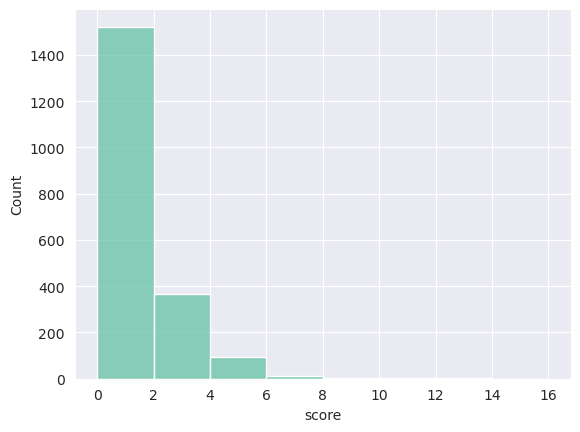

In [78]:
sns.histplot(data=log_boxes[:2000], x="score", bins=[0, 2, 4, 6, 8, 10, 12, 14, 16])

---

In [28]:
def filter_rows_by_common_value(df_list, col):
    
    if len(df_list) < 2:
        raise ValueError("At least two DataFrames are required.")

    
    common_values = set(df_list[0][col])

    for df in df_list[1:]:
        common_values.intersection_update(set(df[col]))

    # Filter rows based on the common values in the specified column
    result_df_list = [df[df[col].isin(common_values)] for df in df_list]

    return result_df_list

In [29]:
result_df_list = filter_rows_by_common_value([nano_model, small_model, med_model, large_model, log_v1], "total_processed")

In [57]:
result_df_list[4]

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5l,0.901400,1,67.593211,42.6,2.144820,2.136698,8.295528,2.141365
1,2,3.846236,100,229.161,yolov5l,0.712032,8,17.633988,68.1,0.509227,0.506502,8.518170,2.682491
2,3,3.523685,100,236.386,yolov5s,0.636238,14,40.836809,38.9,1.319523,1.317237,9.556650,4.033035
3,4,3.609265,100,197.637,yolov5m,0.596707,19,51.332815,45.8,1.619568,1.617044,10.954474,5.688496
4,5,3.473911,100,171.976,yolov5n,0.441152,19,37.402798,36.1,1.203129,1.200910,11.898094,6.916873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,2070,2.170989,100,225.103,yolov5n,0.466727,3,2.734307,33.2,0.080710,0.077715,0.615179,754.965692
2068,2071,2.050800,100,145.594,yolov5n,0.672690,10,4.044423,96.6,0.113182,0.108171,0.286514,755.114321
2069,2072,1.825213,100,251.726,yolov5n,0.538921,4,2.340326,31.0,0.068252,0.065751,0.606342,755.900306
2070,2073,2.043832,100,318.454,yolov5n,0.530472,18,2.534295,62.8,0.073248,0.070514,0.230077,756.017078


In [59]:
# for i, r in result_df_list[0].iterrows():
#     print(r["avg_conf"])

0.7217363715171814
0.5078499217828115
0.6245309822261333
0.547536721596351
0.4375385791063308
0.0
0.6972536891698837
0.845280110836029
0.6501817852258682
0.7865880131721497
0.842924952507019
0.7523782551288605
0.4236668248971303
0.5433944910764694
0.5283311009407043
0.4590937197208404
0.5068606598810717
0.6148033142089844
0.6606173382865058
0.6934424042701721
0.5377476712067922
0.4334505647420883
0.5948991358280182
0.6241199225187302
0.449777419368426
0.5573554535706838
0.0
0.5008957386016846
0.3169638017813365
0.3681476149294111
0.543250633911653
0.3063444197177887
0.3258295357227325
0.5346477131048838
0.5343975238502026
0.5345943619807562
0.8038560152053833
0.602683194658973
0.3233646916018592
0.4935550466179847
0.8564379811286926
0.8365878164768219
0.5606049299240112
0.7812859614690145
0.807424932718277
0.0
0.6081342250108719
0.705061776297433
0.4239142925842948
0.0
0.4417129158973694
0.5773507697241647
0.8912544051806132
0.6256448030471802
0.5928356399138769
0.4157920032739639
0.49

In [60]:
i = 0

for (idx_n, img_n), (idx_s, img_s), (idx_m, img_m), (idx_l, img_l), (idx_adp, img_adp) in zip(result_df_list[0].iterrows(), result_df_list[1].iterrows(), result_df_list[2].iterrows(), result_df_list[3].iterrows(), result_df_list[4].iterrows()):
    tradeoff_n = img_n["energy_consumption(J)"]*(1 - img_n["avg_conf"])
    tradeoff_s = img_s["energy_consumption(J)"]*(1 - img_s["avg_conf"])
    tradeoff_m = img_m["energy_consumption(J)"]*(1 - img_m["avg_conf"])
    tradeoff_l = img_l["energy_consumption(J)"]*(1 - img_l["avg_conf"])
    tradeoff_adp = img_adp["energy_consumption(J)"]*(1 - img_adp["avg_conf"])

    if i % 100 == 0:
        print(tradeoff_n, tradeoff_s, tradeoff_m, tradeoff_l, tradeoff_adp)
    i += 1


0.43307031118029354 0.4810619886074066 0.7282721479768753 1.2698685254021271 6.664668455487958
0.3186430486763518 1.8913837855022253 2.9206640634675534 5.279416261130226 1.706780611769915
0.47178917082107064 1.5719559306522757 3.1090011357531346 5.825914459168583 5.4531693930305245
0.8277878535645604 1.8760096459262567 1.4359134538298846 2.1220201736961006 0.44854887168407437
0.32530479084587094 0.9984701070644059 1.0888948558710414 1.4694621475338936 0.7276087359986305
0.9120545505931974 1.7155513235898017 3.412377537388288 5.408902053736846 1.9723458479182623
0.5872739350005314 2.3688842294465617 2.42461305224251 5.475592078770757 0.8628825804495215
1.102658 1.8215021597439052 1.076384032100916 2.457888685914457 0.5091572009841203
0.5133493819803128 1.7314225925207138 2.808538723699801 5.188739841203689 2.106481710228581
0.6676204459639601 1.4586840704396917 4.946252237493699 6.217919750554674 1.4420914617060996
0.761535627685547 1.4497436139041184 0.8902066057330369 4.27824433975860